# Random Forest Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
import pandas as pd
import sys
from pylab import rcParams
import seaborn as sb
#np.set_printoptions(threshold=sys.maxsize)

## Importing the dataset

In [3]:
dataset = pd.read_csv('../model/Elastic_model.csv')
dataset_plot = dataset.iloc[:,:4]
X = dataset.iloc[:, :4].values # first 4 column
y = dataset.iloc[:, -2].values # stress

In [4]:
dataset

Radius  Coil diameter  Pitch angle  Pitch length  Number of turns  \
0     16.262339      12.845270    30.082893     59.190508         2.100896   
1     25.780331      13.516242    19.455152     57.218395         1.000000   
2      7.171339       5.513662    33.093158     29.365828         0.769795   
3     12.859950      10.774433    40.158599     68.182496         2.079254   
4      4.008545       4.988327    49.200963     29.179755         1.362008   
...         ...            ...          ...           ...              ...   
8793  24.358935       8.514916     7.882948     21.191252         2.722232   
8794  24.156284      10.037542     6.272634     16.683120         2.919859   
8795  25.604611      10.220599     7.411364     20.926919         2.147378   
8796  37.067673      12.539133     7.426437     30.358108         1.953097   
8797  30.690785      11.738705     6.940693     23.474681         1.968354   

      Total length     Stress    Strain  
0       124.353083   2.775207  0.000205  
1        57.218395   1.024435  0.000364  
2        22.605658   3.703510  0.000395  
3       141.768722   1.992788  0.000890  
4        39.743061  10.443720  0.001043  
...            ...        ...       ...  
8793     57.687501   5.369076  3.543522  
8794     48.712355   4.548211  3.564174  
8795     44.938006   5.151424  3.659972  
8796     59.292330   4.697820  3.711625  
8797     46.206471   5.559338  3.865721  

[8798 rows x 8 columns]

## Data Visualization

In [ ]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

[]

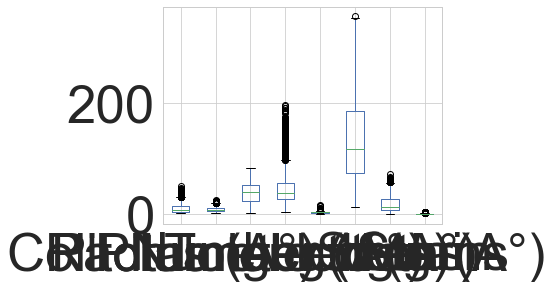

In [ ]:
dataset.boxplot(return_type='dict')
plt.plot()

### Pairplot

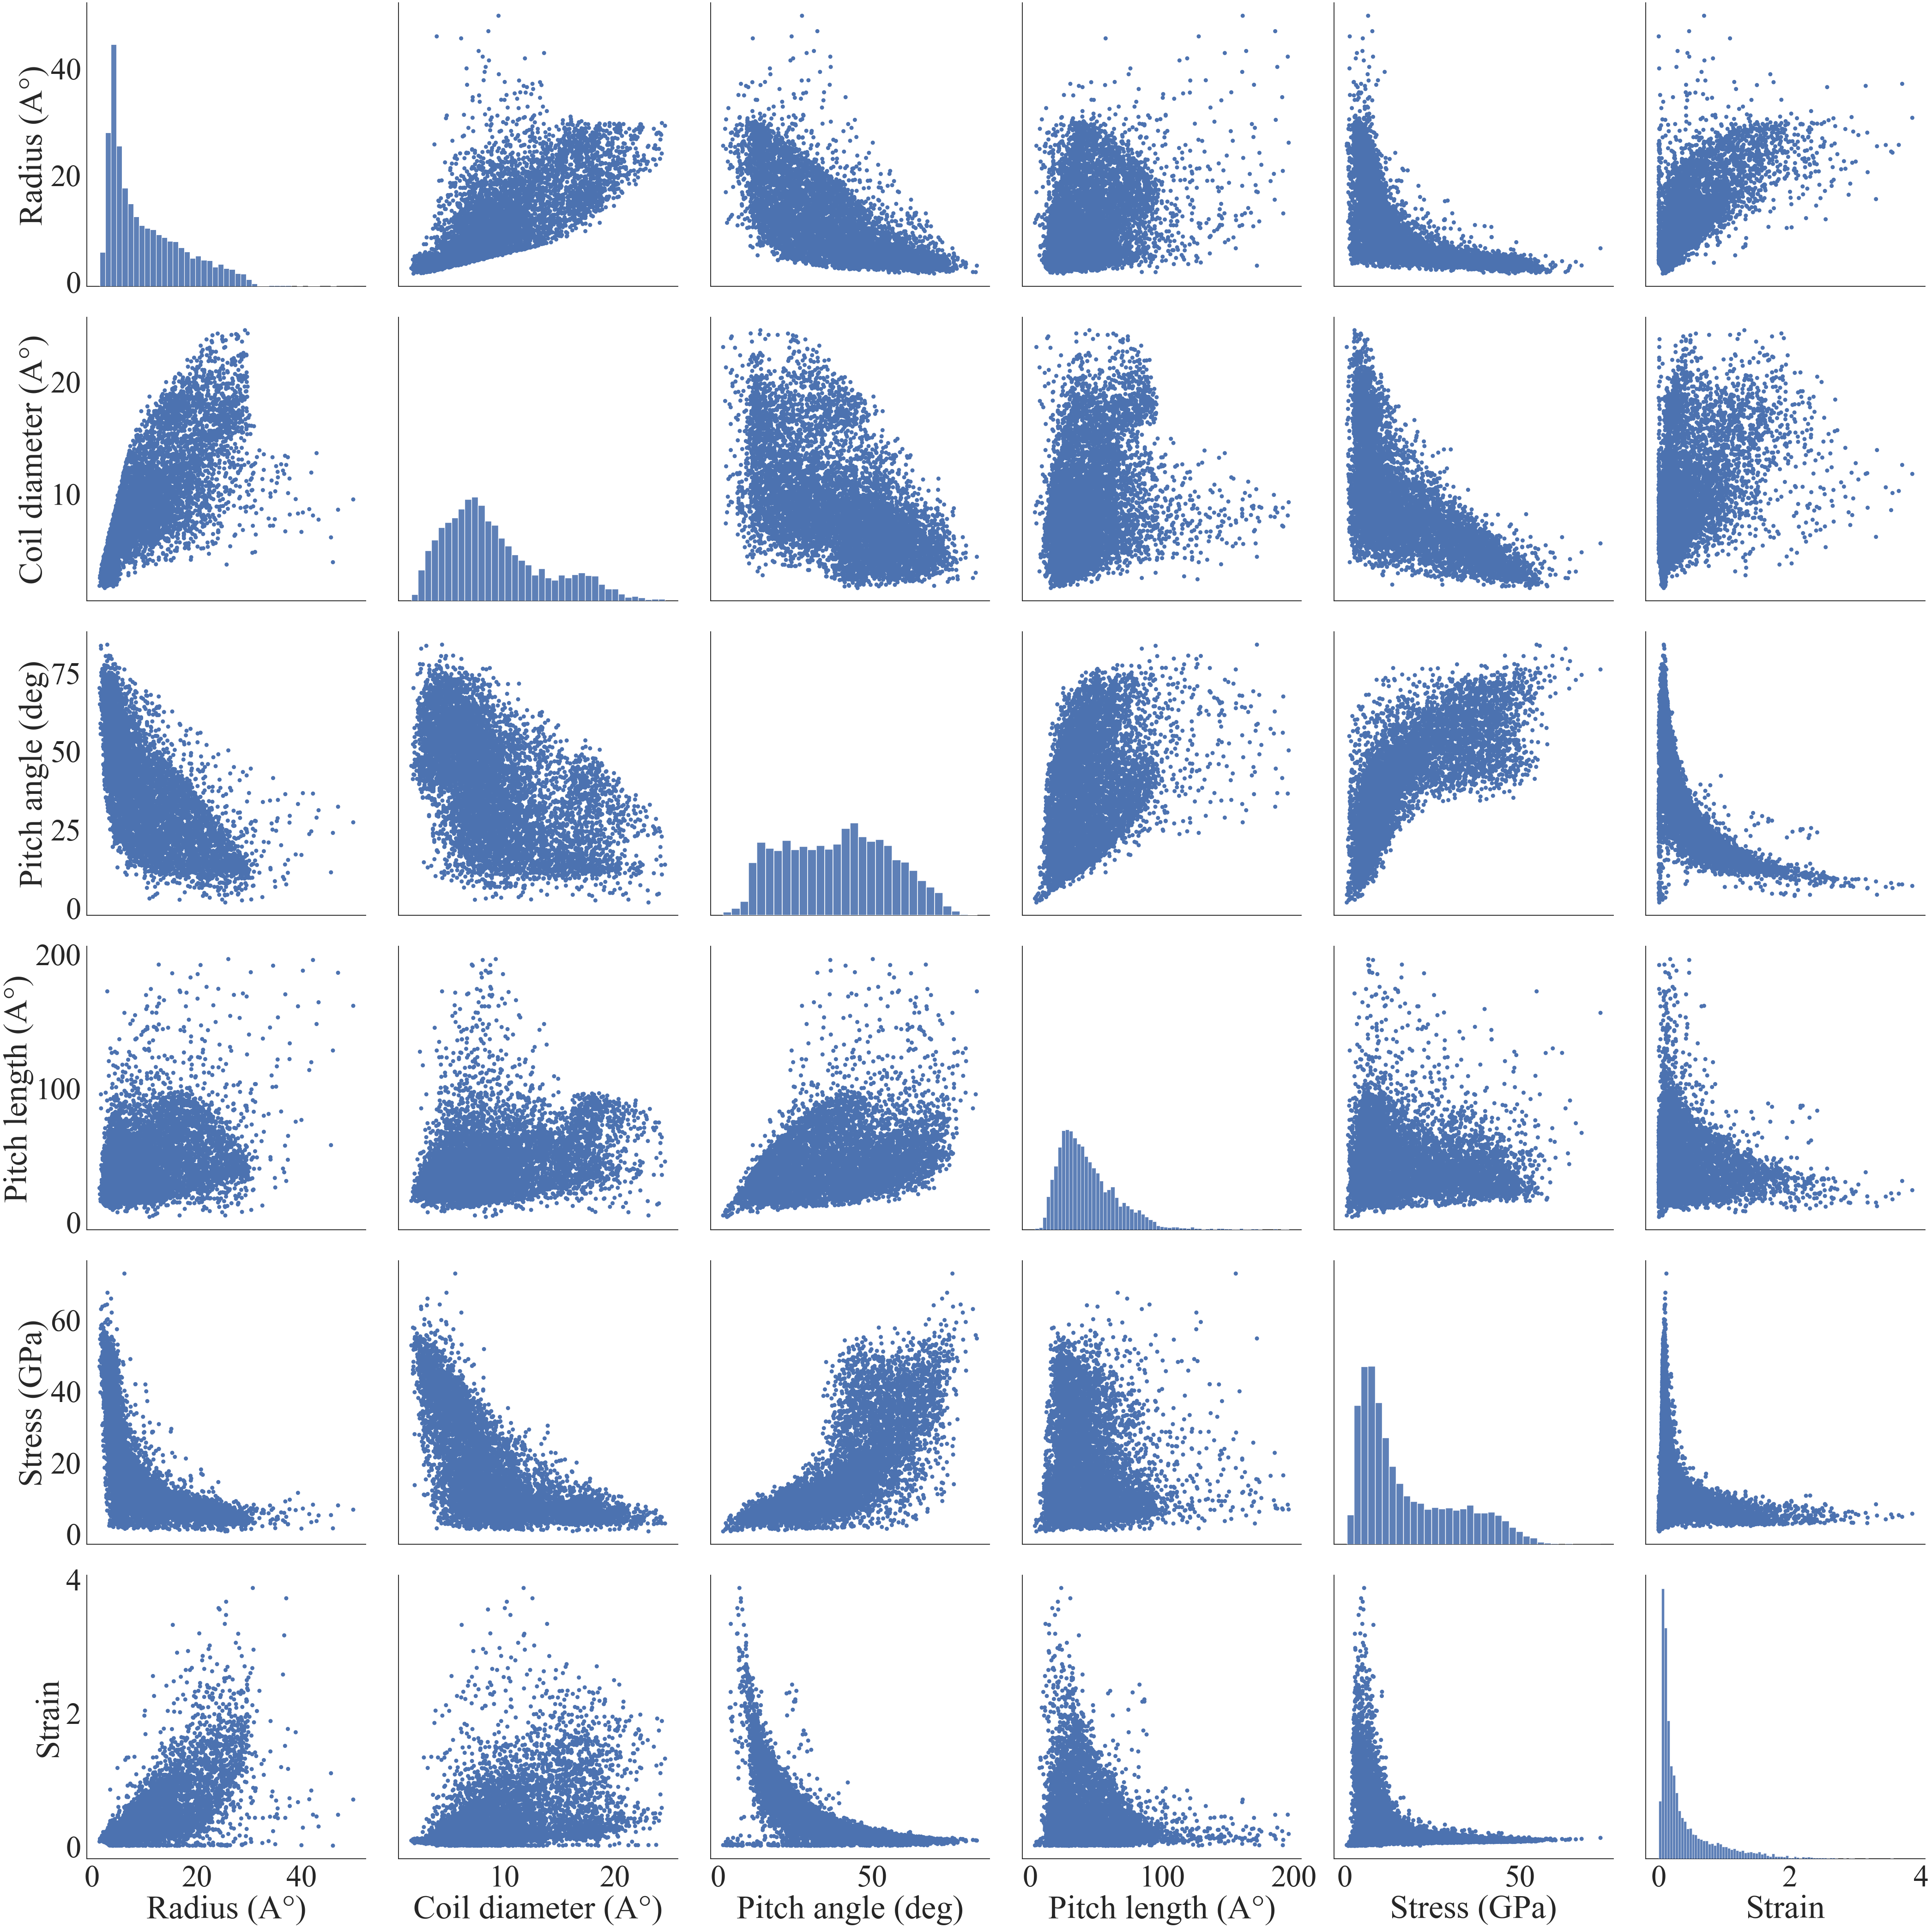

<Figure size 432x288 with 0 Axes>

In [45]:

sb.set(font="Times New Roman",style='white')

sb.set_context("talk", font_scale = 4)
sb.pairplot(vars = ['Radius (A°)', 'Coil diameter (A°)', 'Pitch angle (deg)', 'Pitch length (A°)','Stress (GPa)','Strain'],
             data = dataset,
             kind = 'scatter',
             diag_kind = "hist",
             diag_kws = {'alpha':.9},
            height = 10,
            aspect = 1,
            plot_kws=dict(edgecolor="none"))

plt.show()
plt.clf()

### Correlation matrix

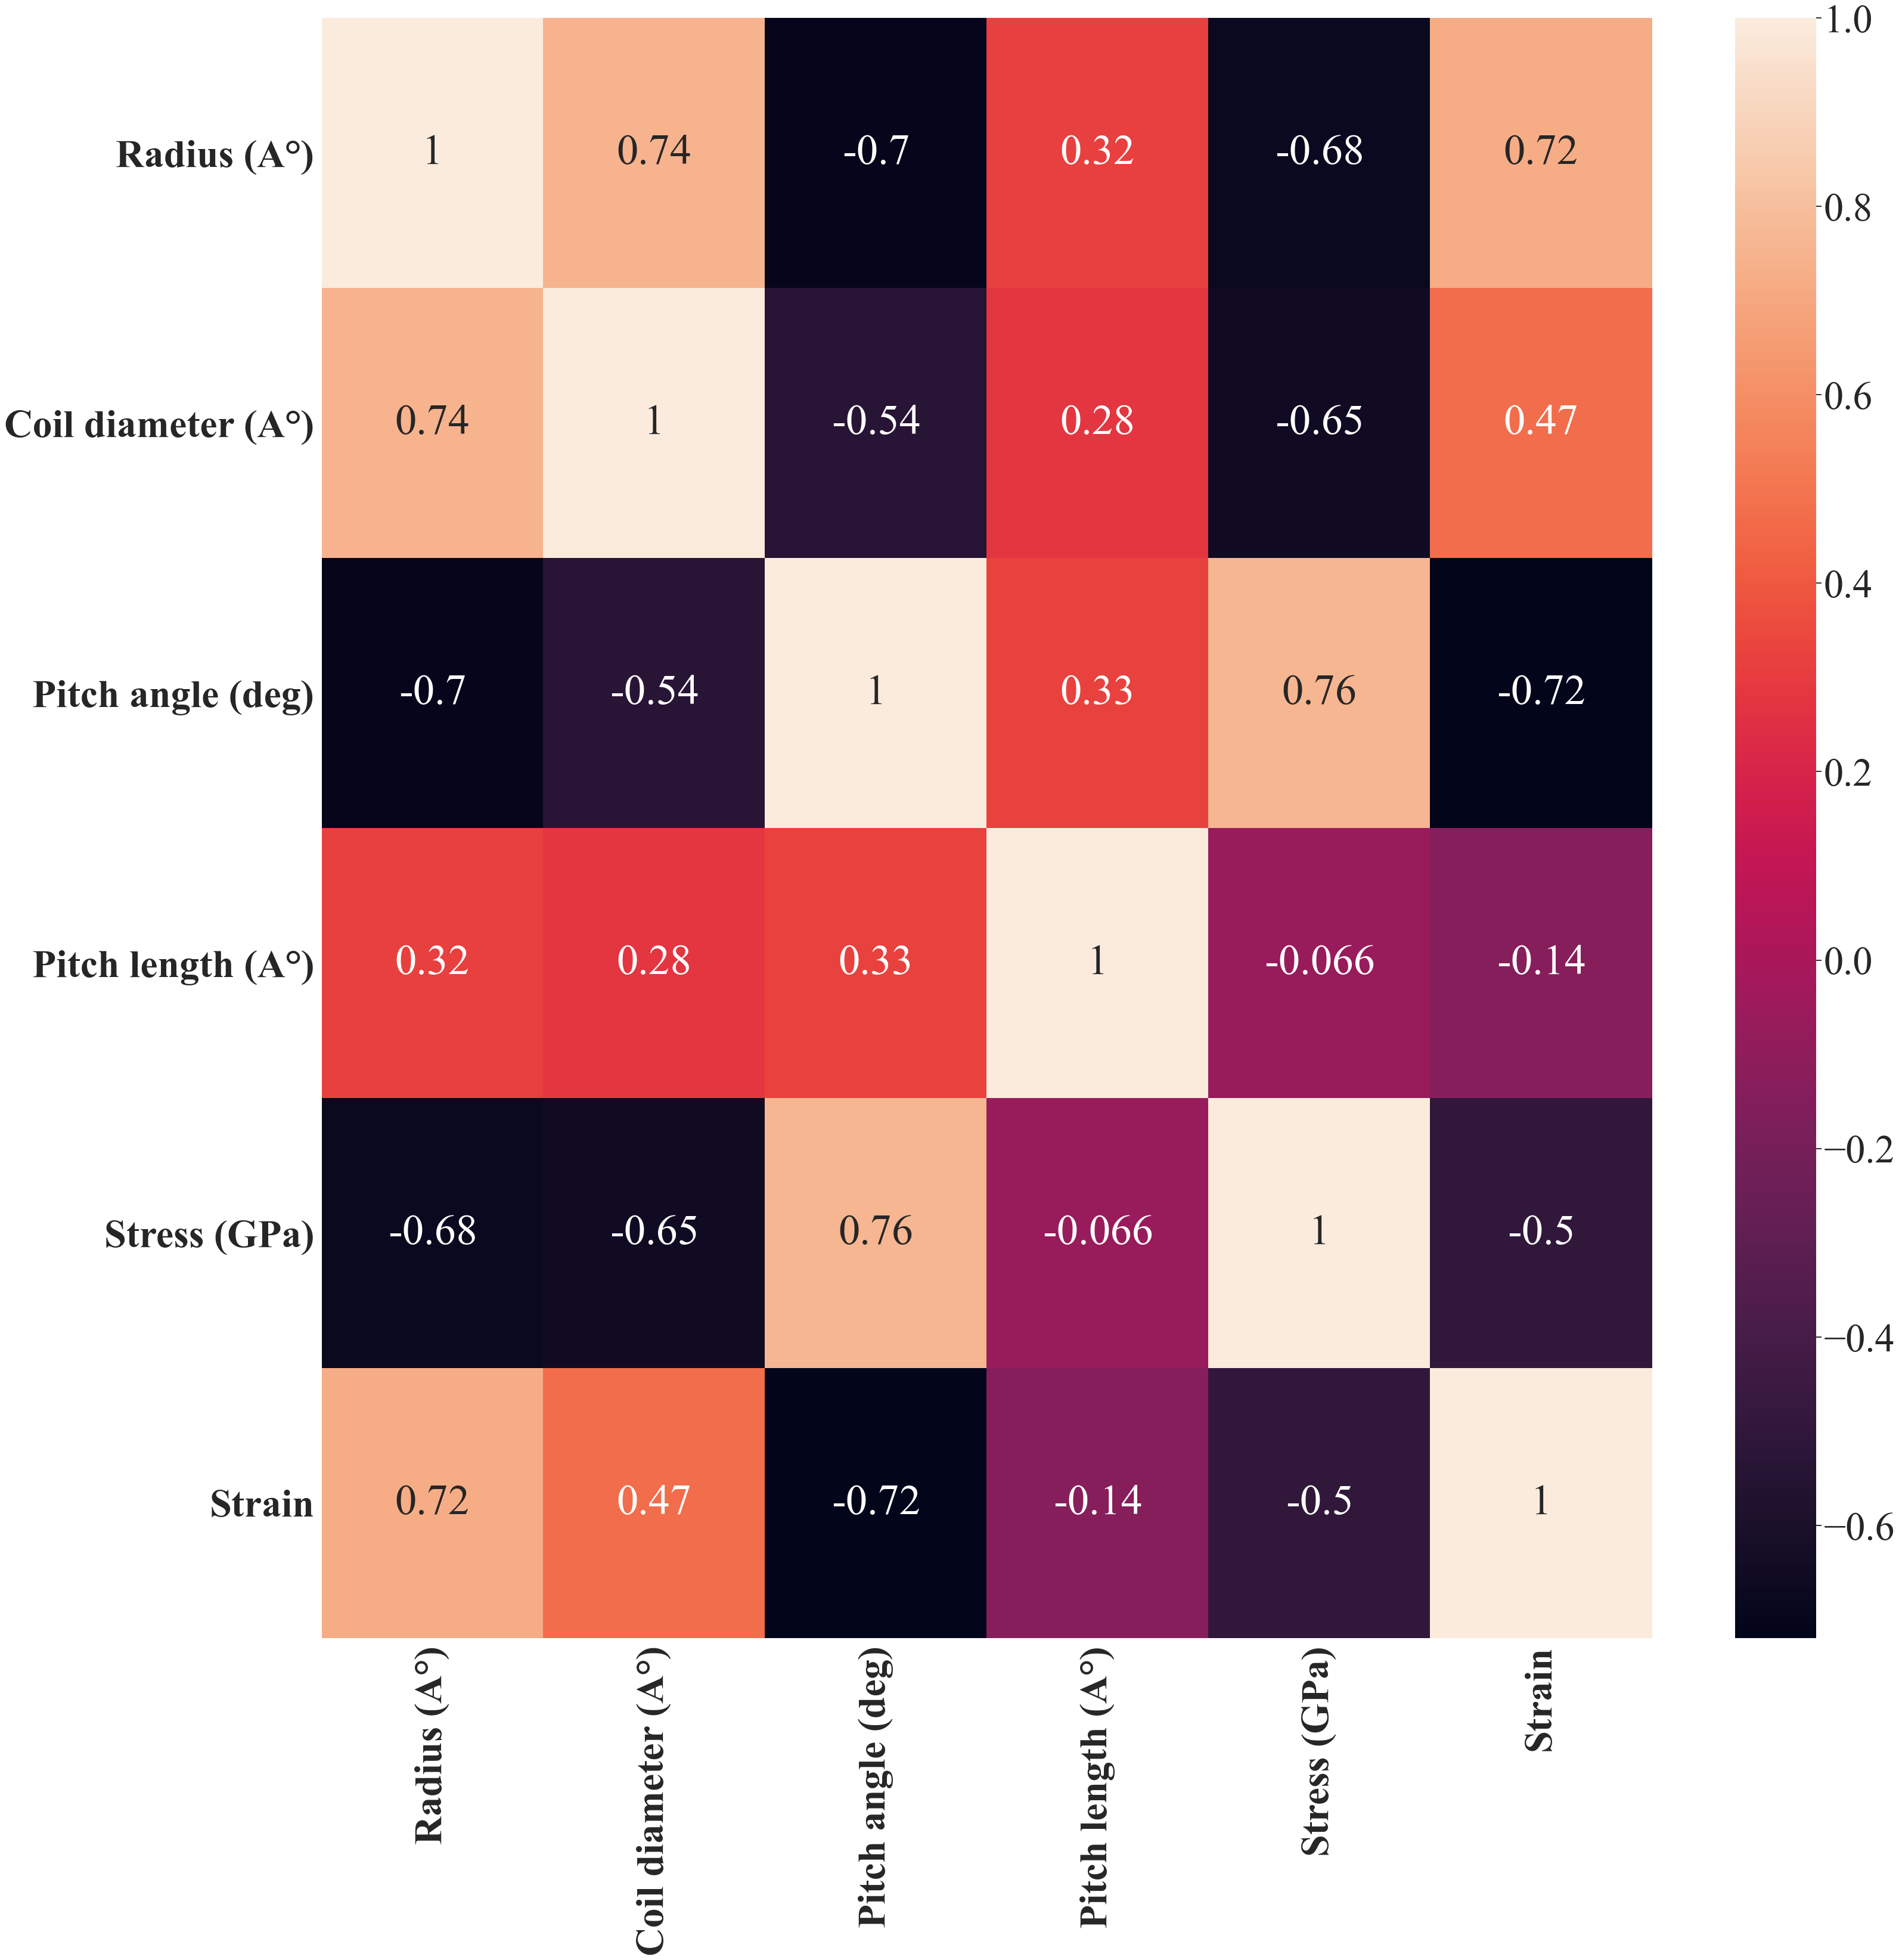

In [53]:
plt.figure(figsize=(50,50))
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold' )
dataset_trunc = dataset[['Radius (A°)', 'Coil diameter (A°)', 'Pitch angle (deg)', 'Pitch length (A°)','Stress (GPa)','Strain']]
correlation_mat = dataset_trunc.corr()

sb.heatmap(correlation_mat, annot = True)


plt.show()

## Outlier Detection
A simple approach is eliminating data that are higher than 1.5*(75%-25%) + 75% or
less than 25% - 1.5*(75%-25%)


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
X_df = pd.DataFrame(dataset)
print(X_df.describe())

       Radius  Coil diameter  Pitch angle  ...  Yield stress  Strainend  Toughness
count 4362.00        4362.00      4362.00  ...       4362.00    4362.00    4362.00
mean     6.56           6.78        44.52  ...         23.94       0.71       5.64
std      4.08           3.22        16.59  ...         15.08       0.77       4.88
min      1.45           0.97         2.53  ...          0.90       0.01       0.00
25%      3.79           4.48        32.37  ...         10.37       0.21       2.85
50%      4.95           6.38        44.84  ...         20.83       0.41       3.92
75%      8.14           8.30        55.73  ...         36.68       0.90       6.42
max     26.38          19.15        85.71  ...         67.82       6.21      41.64

[8 rows x 9 columns]


## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## PCA

In [6]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
pca.explained_variance_ratio_

array([0.82446871, 0.15170817, 0.02050708, 0.00331604])

## Training the Random Forest Regression model on the whole dataset

In [8]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 41)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=41)

## Predicting the Test set results

In [10]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=3,suppress=True)
predVSact_test = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
np.savetxt('predVSact_test.csv', predVSact_test, delimiter=',')
print(predVSact_test)

[[17.23   8.005]
 [ 9.127 10.478]
 [ 7.956  7.584]
 ...
 [30.803 29.676]
 [47.29  56.974]
 [24.326 38.648]]


In [11]:
y_pred_train = regressor.predict(X_train)
np.set_printoptions(precision=3,suppress=True)
predVSact_train = np.concatenate((y_pred_train.reshape(len(y_pred_train),1), y_train.reshape(len(y_train),1)),1)
np.savetxt('predVSact_test.csv', predVSact_test, delimiter=',')
print(predVSact_train)

[[35.418 34.094]
 [38.455 32.755]
 [ 6.773  6.457]
 ...
 [45.215 44.269]
 [ 4.196  3.623]
 [23.409 15.233]]


## Evaluating the Model Performance

In [12]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

38.65041828476343

In [13]:
mean_squared_error(y_train, y_pred_train)

5.66897370978994

In [14]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8687728621787381

In [15]:
r2_score(y_train, y_pred_train)

0.9804971605462154

## Feature importances 

### 1. Default Scikit-learn’s feature importances

In [17]:
y_train=pd.DataFrame(data=y_train)
X_train=pd.DataFrame(data=X_train)

In [18]:
import time
import numpy as np

start_time = time.time()
importances = regressor.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in regressor.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.024 seconds


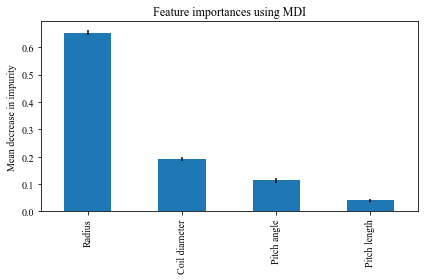

In [19]:
feature_names = list(dataset.columns)[:4]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### 2. Permutation Importance using default sklean

In [20]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    regressor, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 9.691 seconds


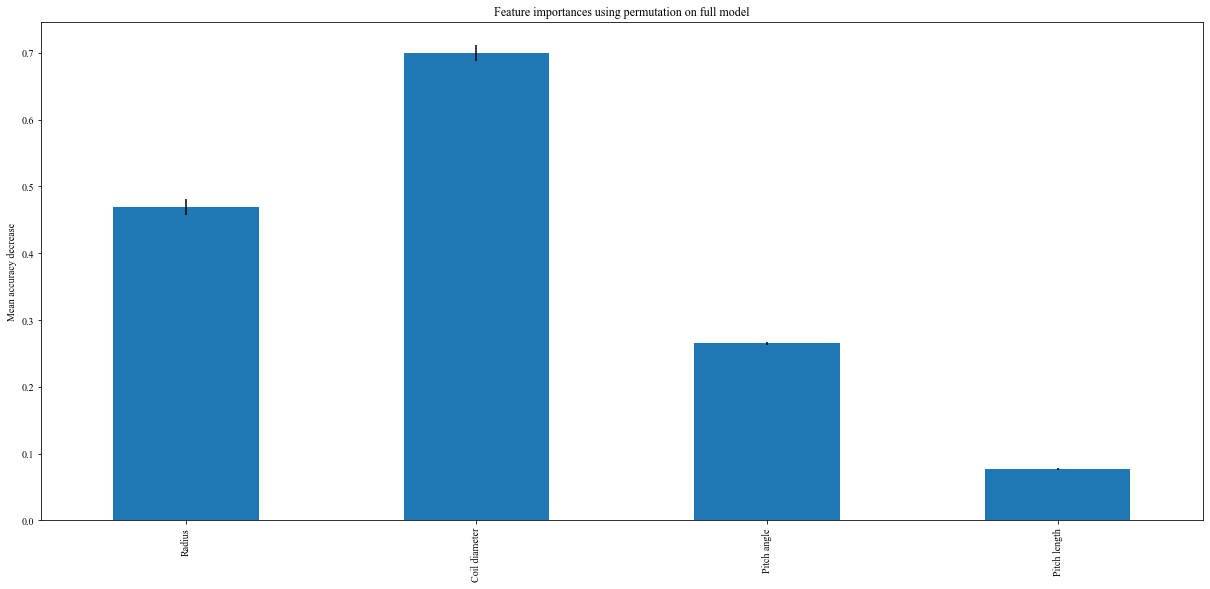

In [21]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
fig.set_size_inches(18.5, 10.5) 
plt.rcParams.update({'font.size': 30})
plt.show()

### 3. Permutation Importance using rfpimp Lib

In [22]:
pip install rfpimp

  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10668 sha256=cf0d08a62dec2f40f41b73ce0952024822b07fed224494ead762f845d33b2fc8
  Stored in directory: c:\users\shahini\appdata\local\pip\cache\wheels\8a\42\e5\d2e9d77df351103d7d16dbc82ce6090cb2f71cee74b7380b7b
Successfully built rfpimp
Note: you may need to restart the kernel to use updated packages.


In [23]:
from rfpimp import permutation_importances

def r2(rf, X_train, y_train):
    return r2_score(y_train, regressor.predict(X_train))

perm_imp_rfpimp = permutation_importances(regressor, X_train, y_train, r2)

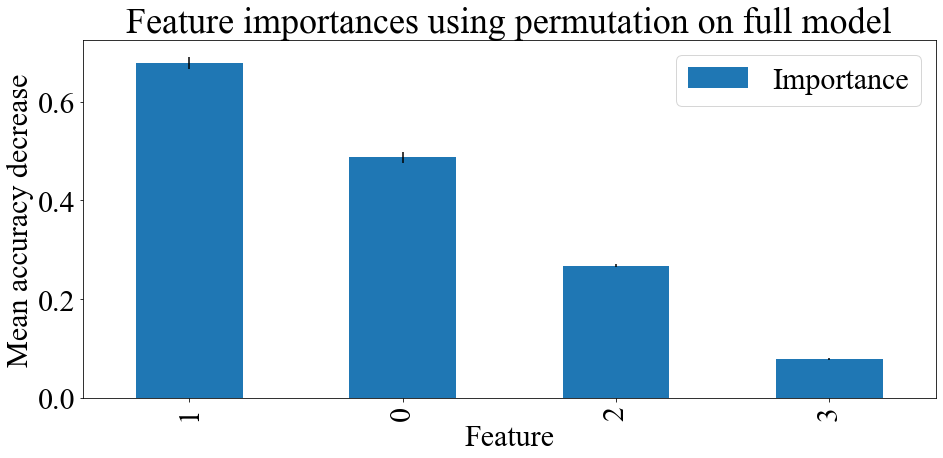

In [24]:
fig, ax = plt.subplots()
perm_imp_rfpimp.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
fig.set_size_inches(18.5, 10.5) 
plt.rcParams.update({'font.size': 30})
plt.show()

## Learning curve

In [28]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(regressor, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

In [29]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

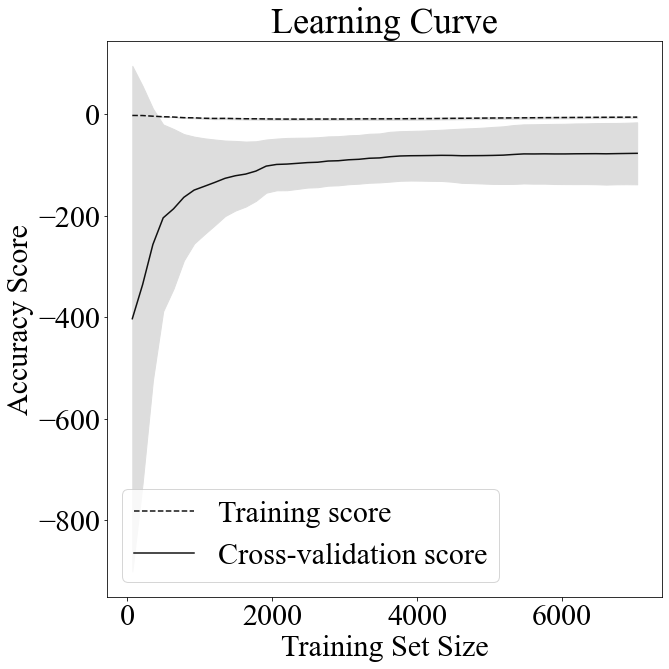

In [30]:
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()